Mean Squared Error: 49830096.85590839
Coefficients: [9423.81532303]
Intercept: 25321.583011776813


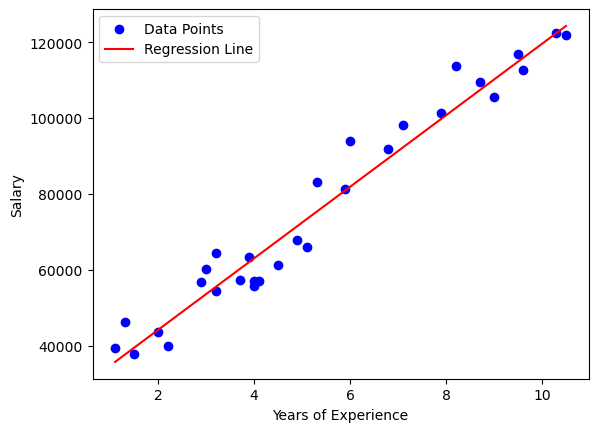

R-squared: 0.9024461774180497
Mean Absolute Error: 6286.453830757749
Root Mean Squared Error: 7059.04362190151


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Added mean_squared_error

# Reading csv file 
data = pd.read_csv(r"C:\Users\sayed\Desktop\Practce\Salary_Data.csv")
data.head()

# Exploratory Data Analysis 
data.describe()
data.isnull().sum()
data.skew
data.head()

X = data.drop(['Salary'], axis=1)
y = data['Salary']  # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Step 7: Visualize the results
# Scatter plot for the original data
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line (using the training data)
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


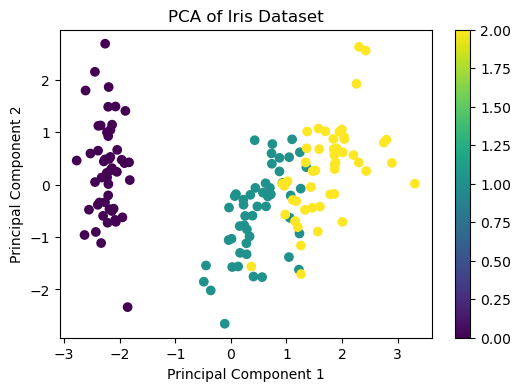

In [29]:
# Practise to implement PCA in code 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Standardizing the data 
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce the dimensions 
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

# Visualizing the reduced data in 2D
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()


In [1]:
# Practice to use titanic data set and implement machine learning 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
import seaborn as sns
import warnings

data = pd.read_csv(r"C:\Users\sayed\Desktop\AIMLStudyMaterial\logistic regression\titanic_new.csv")

data =data.drop(['Name'],axis=1)
#data.head(2)
data =data.drop(['PassengerId','Ticket','Fare'],axis=1)
#data.head()
#data.describe()
#data.isnull().sum()
data =data.drop(['Cabin'],axis=1)
data['Age']=data['Age'].fillna(data['Age'].median())
data.isnull().sum()
data = data.dropna()
data.isnull().sum()
#data.head()
#data.describe()
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
#data.head(50)
data['Embarked'] =data['Embarked'].map({'S':1,'C':0,'Q':2})
data.head()

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler =  StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.7808988764044944

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.70      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178


Confusion Matrix:
[[86 23]
 [16 53]]


Accuracy: 0.8089887640449438

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178


Confusion Matrix:
[[92 17]
 [17 52]]


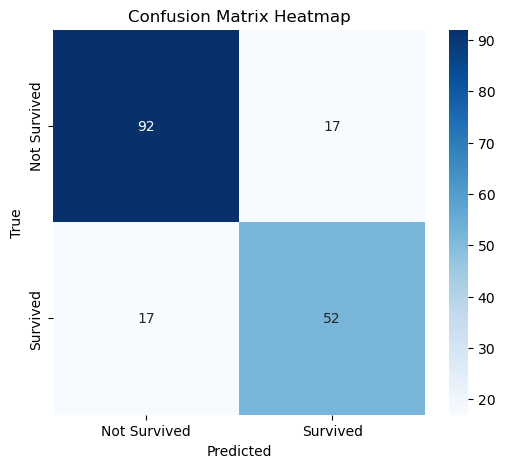

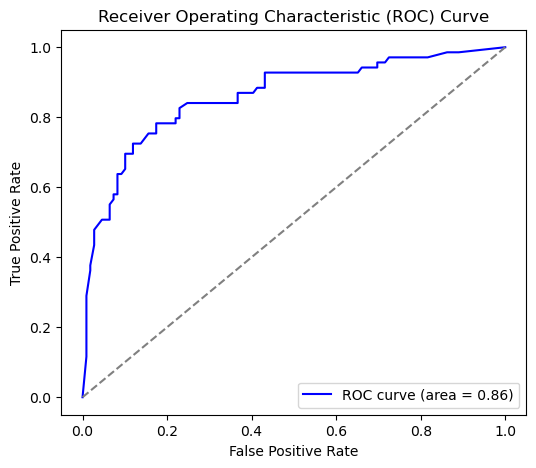

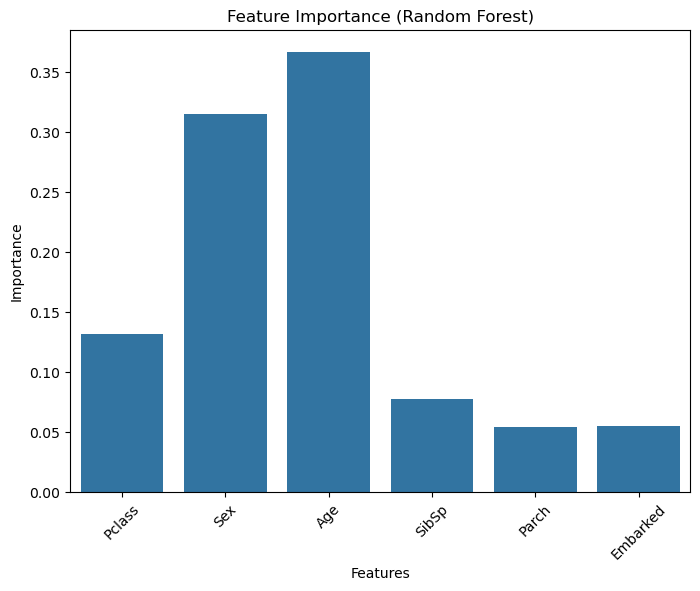

In [228]:
# Implementing Random forest on the above code 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ------------------- Visualization -------------------

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Visualization (Random Forest Feature Importances)
feature_importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [246]:
# Implementing the same code using decison tree 

from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled,y_train)

y_pred= dtree.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy score of Decision Tree Classifier is :",(accuracy*100))

The accuracy score of Decision Tree Classifier is : 80.89887640449437


In [288]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators = 45 ,random_state=42)

rf.fit(X_train_scaled,y_train)

y_pred = rf.predict(X_test_scaled)
accuracy =accuracy_score(y_test,y_pred)
print("The accuracy score of the Randomforestclassifier is : ",accuracy*100)
confusionmtrx = confusion_matrix(y_test,y_pred)
print("\n The confusion matrix of the model is :\n", confusionmtrx)
performancestats =  classification_report(y_test,y_pred)
print("\n The performance report of the used model is : \n",performancestats)

The accuracy score of the Randomforestclassifier is :  81.46067415730337

 The confusion matrix of the model is :
 [[93 16]
 [17 52]]

 The performance report of the used model is : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.76      0.75      0.76        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

